# Data Wrangling for Twitter - WeRateDog

This article is about the analysis for Twitter WeRateDog account.

### Part 1- Source of the Data
There are 3 sources for the data I used in this project:<br>

<b>(1) WeRateDog' Twitter Archive:</b> <br>
You can download the data using this [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

<b>(2) Tweet Image Predictions:</b> <br>
You can download the data using this [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

<b>(3) WeRateDog data from API:</b> <br>
You need to use Python's [Tweepy](http://www.tweepy.org/) library to get the status data from WeRateDog account.
You may reference these articles:
- [Retweeters of a Twitter status in Tweepy](https://stackoverflow.com/questions/17724988/retweeters-of-a-twitter-status-in-tweepy)
- [How to Generate API Key, Consumer Token, Access Key for Twitter OAuth](https://themepacific.com/how-to-generate-api-key-consumer-token-access-key-for-twitter-oauth/994/)



### Part 2 - Packages used in this report
The following are the python packages required for this project:
- pandas
- numPy
- matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

### Part 3- Key Insights
After cleaning the data, I stored the cleaned data in a file called `twitter_archive_master.csv`. Then, I started my journey of analyzing the data and try to find some insights. Here are some questions that I'm interested in:

- Q1: According to the data we have, when is more prefferable by WeRateDog's fans?
- Q2: What are the top predictions for the photo?
- Q3: Which year has more top posts? 2015, 2016, 2017?

#### Q1: According to the data we have, when are the active time for WeRateDog's fans?

I made a hypothesis that the post released during WeRateDog's fans' active hour will receive more exposure and therefore has more favorite counts.

In [2]:
df = pd.read_csv('twitter_archive_master.csv')

As a result, I try to find when are all the high favorite counts posts are posted. To do this, I use `df.describe()` function.

In [3]:
df['favorite'].describe()

count      2356.000000
mean       8030.370119
std       12126.142180
min           0.000000
25%        1463.750000
50%        3659.000000
75%        9446.250000
max      142629.000000
Name: favorite, dtype: float64

I used `df.query()` to find the time top 25% favorite posts are released.

In [4]:
df.query('favorite > 9447')['hour'].value_counts()

0     110
16    105
1      79
17     61
18     41
15     34
23     32
19     23
22     23
2      23
20     19
21     18
3      13
4       3
5       2
13      1
6       1
14      1
Name: hour, dtype: int64

Let's plot all these data into a plot using `matplotlib`.

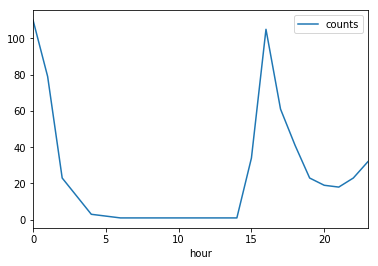

In [5]:
df.query('favorite > 9447')['hour'].value_counts().rename_axis('hour').reset_index(name='counts').sort_values(by=['hour']).plot(x="hour",y="counts");

> From the analysis, we know that it seems like top favorite posts happened in afternoon(16~17) and midnight(0~1).

#### Q2: What are the top predictions for the photo?

In [6]:
df.p1.value_counts()[:20].rename_axis('prediction').reset_index(name='counts')

,prediction,counts
0,golden_retriever,150
1,labrador_retriever,100
2,pembroke,89
3,chihuahua,83
4,pug,57
5,chow,44
6,samoyed,43
7,toy_poodle,39
8,pomeranian,38
9,malamute,30


> From the above table, we know that top predictions for WeRateDog images are "golden_retriever", "labrador_retriever" and "pembroke".

#### Q3: Which year has more top posts? 2015, 2016, 2017?

Let's first find the mean favorite counts for each year's post using `df.groupby()` function.

In [7]:
df.groupby(['year'])['favorite'].mean()

year
2015     2318.933333
2016     6845.527473
2017    19091.571429
Name: favorite, dtype: float64

> From the above, we know that 2017 has more top posts compare to 2015 and 2016.

Please feel free to contact me if you find anything interesting to you during the analysis. You can reach me at my [Email](mailto:samchen0727@gmail.com) or my [Github](https://github.com/zhsam).    :-)